In [1]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import itertools
import numpy as np
from matplotlib import pyplot as plt
import requests
import json

In [2]:
uri = "localhost:27017"
client = MongoClient(uri, server_api=ServerApi('1'))

client.admin.command('ping')

db = client.test
historical_evolution_data = db.historicalEvolutionData
problem_instances = db.probleminstances
db_prelim_information = db.prelimInformation
conflict_evolution_data = db.conflictEvolutionData

generator_colors = {
    "SimpleGenerator" : "orange",
    "RealisticGenerator" : "blue",
    "LocalSearchController" : "green"
}

plt_xlim = [-0.05,1.05]
plt_ylim = [-0.05,1.05]

experiment_id = "27-09-1000"

x_axis_feature = "blockedPassengerRatio"
y_axis_feature = "conflictFreePassengerSeatingRatio"


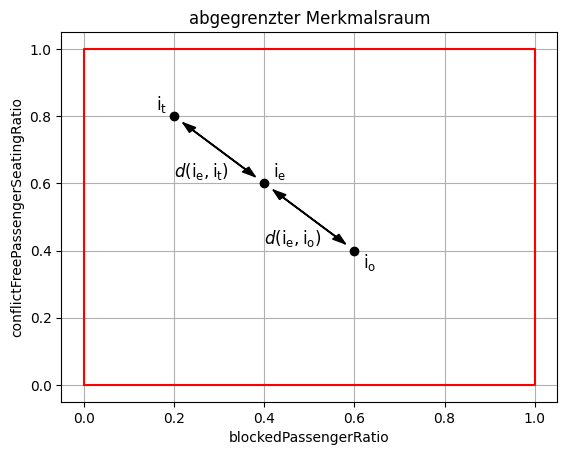

In [3]:
plt.title("abgegrenzter Merkmalsraum")
plt.xlabel(x_axis_feature)
plt.ylabel(y_axis_feature)

ax = plt.gca()
ax.set_axisbelow(True)

plt.arrow(0.38,0.62,-0.16,0.16, length_includes_head=True, head_width=0.02, head_length=0.03, fc='k', ec='k')
plt.arrow(0.22,0.78,0.16,-0.16, length_includes_head=True, head_width=0.02, head_length=0.03, fc='k', ec='k')

plt.arrow(0.58,0.42,-0.16,0.16, length_includes_head=True, head_width=0.02, head_length=0.03, fc='k', ec='k')
plt.arrow(0.42,0.58,0.16,-0.16, length_includes_head=True, head_width=0.02, head_length=0.03, fc='k', ec='k')

plt.scatter(0.6,0.4, color="black")
plt.text(0.62,0.35,  "$\mathregular{i_o}$", fontsize = 12) 

plt.scatter(0.4,0.6, color="black")
plt.text(0.42,0.62,  "$\mathregular{i_e}$", fontsize = 12) 

plt.scatter(0.2,0.8, color="black")
plt.text(0.16,0.82,  "$\mathregular{i_t}$", fontsize = 12) 

plt.text(0.2,0.62,  "$d(\mathregular{i_e},\mathregular{i_t})$", fontsize = 12) 
plt.text(0.4,0.42,  "$d(\mathregular{i_e},\mathregular{i_o})$", fontsize = 12) 


borders = [[0,0],[1,0],[1,1],[0,1],[0,0]]
xs, ys = zip(*borders)
plt.plot(xs, ys, color= "red")

plt.xlim(plt_xlim)
plt.ylim(plt_ylim)
    
plt.grid()
plt.show()

In [4]:
def post_conflict_evolution(experiment_id, instance, mutation_name, conflict_coords):
    url = 'http://localhost:8080/conflict/evolution'
    data = {
    "experimentId" : experiment_id,
    "instanceCount" : 50,
    "mutationName" : mutation_name,
    "instance" : instance,
    "conflictCoordinates" : conflict_coords
    }
    headers = {'Content-Type': 'application/json'}

    requests.post(url, json=data, headers=headers)


In [24]:
instances = problem_instances.find({"experimentId" : "31-07-800", "featureDescription.totalCongestion" : {"$gte" : 0.78}, "featureDescription.totalPassengerCount" : {"$lte" : 200}})

for instance in instances:
    railcarriages = instance["problem"]["train"]["railCarriages"]
    railcarriages = list(map(lambda x: x["capacity"], railcarriages))
    if (0 not in railcarriages and len(railcarriages) > 2):
        x = 1
        print(instance["instanceId"] + " " +  str(instance["featureDescription"]["totalPassengerCount"]))

simple_275 157


In [6]:
def plot_conflict_evolution(evolution_data):
    start_generation_x_coords = [data[x_axis_feature] for data in evolution_data["startGeneration"]]
    start_generation_y_coords = [data[y_axis_feature] for data in evolution_data["startGeneration"]]
    plt.scatter(start_generation_x_coords, start_generation_y_coords, color= "blue")

    for history in evolution_data["coordinateHistories"]:
        history_x_coords = [data[x_axis_feature] for data in history]
        history_y_coords = [data[y_axis_feature] for data in history]
        plt.scatter(history_x_coords, history_y_coords, color= "green")

    plt.scatter(evolution_data["startCoordinates"][x_axis_feature],evolution_data["startCoordinates"][y_axis_feature], color="red")

    plt.title(evolution_data["instanceId"])
    plt.xlabel(x_axis_feature)
    plt.ylabel(y_axis_feature)

    plt.xlim(plt_xlim)
    plt.ylim(plt_ylim)
    
    plt.grid()
    return plt

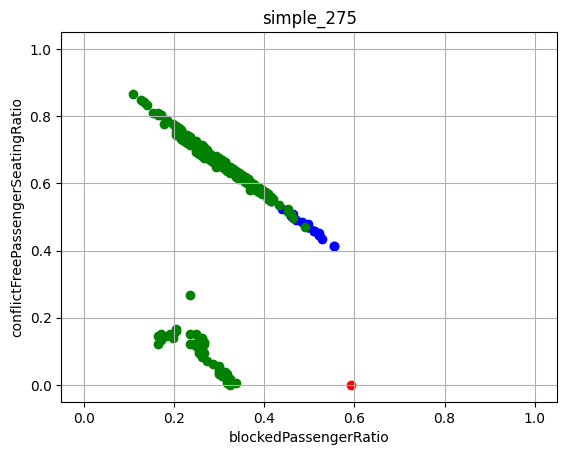

In [44]:
with open('simple_275.json', 'r') as f:
    problem_instance = json.load(f)
f.close

conflict_coordinates = [{"blockedPassengerRatio": 0.0, "conflictFreePassengerSeatingRatio": 1.0}, 
            {"blockedPassengerRatio": 0.5, "conflictFreePassengerSeatingRatio": 1.0}, 
            {"blockedPassengerRatio": 1.0, "conflictFreePassengerSeatingRatio": 1.0}, 
            {"blockedPassengerRatio": 1.0, "conflictFreePassengerSeatingRatio": 0.5}, 
            {"blockedPassengerRatio": 1.0, "conflictFreePassengerSeatingRatio": 0.0}, 
            {"blockedPassengerRatio": 0.5, "conflictFreePassengerSeatingRatio": 0.0}, 
            {"blockedPassengerRatio": 0.0, "conflictFreePassengerSeatingRatio": 0.0}, 
            {"blockedPassengerRatio": 0.0, "conflictFreePassengerSeatingRatio": 0.5}] 

#conflict_coordinates = [{"blockedPassengerRatio": 0.0, "conflictFreePassengerSeatingRatio": 1}] 

evo_data_experiment_id = "ev-4"

conflict_evolution_data.delete_many({"experimentId" : evo_data_experiment_id})

post_conflict_evolution(evo_data_experiment_id, problem_instance, "ChangeOptimalRailCarriageMutation", conflict_coordinates)

conflict_evolution = list(conflict_evolution_data.find({"experimentId" : evo_data_experiment_id}))

for ce in conflict_evolution:
    plot_conflict_evolution(ce)

In [43]:
with open('simple_275.json', 'r') as f:
    problem_instance = json.load(f)
f.close

total_capacity = 


simple_66 591
simple_108 426
simple_151 531
simple_157 272
simple_211 1025
simple_360 505
simple_372 726
realistic_2 1043
realistic_3 1164
realistic_6 465
realistic_7 776
realistic_14 1377
realistic_17 657
realistic_18 999
realistic_19 1316
realistic_20 1035
realistic_21 1933
realistic_23 976
realistic_28 1499
realistic_30 797
realistic_32 740
realistic_37 1229
realistic_40 1356
realistic_42 1419
realistic_46 523
realistic_48 2096
realistic_50 1329
realistic_53 1078
realistic_56 880
realistic_57 945
realistic_58 2729
realistic_60 1489
realistic_63 1063
realistic_64 537
realistic_65 791
realistic_66 1101
realistic_70 1784
realistic_71 637
realistic_76 1217
realistic_79 625
realistic_82 964
realistic_83 1176
realistic_85 1251
realistic_86 709
realistic_88 403
realistic_91 1364
realistic_92 2311
realistic_103 1423
realistic_106 459
realistic_111 1135
realistic_112 1421
realistic_114 1339
realistic_118 1075
realistic_119 2616
realistic_122 947
realistic_124 1257
realistic_130 1298
realisti